In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.animation as animation
import matplotlib
from IPython.display import HTML
import plotly.graph_objects as go  #plotly 4.0.0rc1
from plotly.subplots import make_subplots
from matplotlib import pyplot
import plotly.figure_factory as ff
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import itertools

from importlib import reload
import matplotlib.cm as cm # matplotlib's color map library
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## Heat map of variational bounds as a function of estimated sufficient statistics

### $\sigma_q$ vs $\alpha$ 

/home/francesco/.local/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


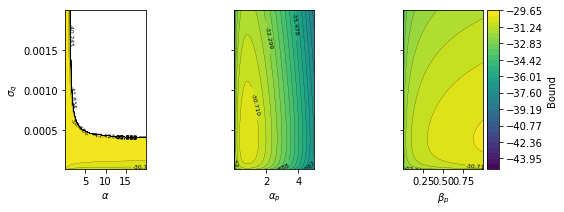

In [3]:
# load data from simulations:
data_contour1 = pd.read_csv('../../numerical_analysis/contour_alpha_sigmaq.csv')
data_contour1 = data_contour1.loc[:, ~data_contour1.columns.str.contains('^Unnamed')]
data_contour1 = data_contour1.fillna(np.nanmin(data_contour1.to_numpy()))
data_contour2 = pd.read_csv('../../numerical_analysis/contour_alpha_p_sigmaq.csv')
data_contour2 = data_contour2.loc[:, ~data_contour2.columns.str.contains('^Unnamed')]
data_contour3 = pd.read_csv('../../numerical_analysis/contour_beta_p_sigmaq.csv')
data_contour3 = data_contour3.loc[:, ~data_contour3.columns.str.contains('^Unnamed')]

levels = np.linspace(min_lev,data_contour1.to_numpy().max(), num=30)

delta11 = 0.02
delta12 = 0.00001
delta21 = 0.002
delta22 = 0.00001
delta31 = 0.002
delta32 = 0.00001
xlist1 = np.arange(0.0001, 20, delta11)
ylist1 = np.arange(0.00001, 0.002, delta12)
xlist2 = np.arange(0.0001, 5, delta21)
ylist2 = np.arange(0.00001, 0.002, delta22)
xlist3 = np.arange(0.0001, 1, delta31)
ylist3 = np.arange(0.00001, 0.002, delta32)

x1, y1 = np.meshgrid(xlist1, ylist1)
x2, y2 = np.meshgrid(xlist2, ylist2)
x3, y3 = np.meshgrid(xlist3, ylist3)

fig, axes = plt.subplots(1,3,  figsize =(7,3))

cpf1 = axes[0].contourf(x1, y1, data_contour1.values.tolist(), levels)
line_colors1 = ['black' for l in cpf1.levels]
cp1 = axes[0].contour(x1, y1, data_contour1.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes[0].clabel(cp1, cp1.levels[::3], inline=True, fontsize=6)

cpf2 = axes[1].contourf(x2, y2, data_contour2.values.tolist(), levels)
line_colors2 = ['black' for l in cpf2.levels]
cp2 = axes[1].contour(x2, y2, data_contour2.values.tolist(),
                       levels=levels, colors=line_colors2, linewidths=linewidth_contour)
axes[1].clabel(cp2, cp2.levels[::3], inline=True, fontsize=6)

cpf3 = axes[2].contourf(x3, y3, data_contour3.values.tolist(), levels)
line_colors2 = ['black' for l in cpf3.levels]
cp3 = axes[2].contour(x3, y3, data_contour3.values.tolist(),
                       levels=levels, colors=line_colors3, linewidths=linewidth_contour)
axes[2].clabel(cp3, cp3.levels[::3], inline=True, fontsize=6)

#line_colors1 = ['black']
axes[0].set_xlabel(r'$\alpha$')
axes[0].set_ylabel(r'$\sigma_q$')
axes[1].set_xlabel(r'$\alpha_p$')
axes[2].set_xlabel(r'$\beta_p$')
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])

axins3 = inset_axes(axes[2],
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes[2].transAxes,
                   borderpad=0,
                   )

plt.colorbar(cpf3,label='Bound', cax=axins3)  # draw colorbar
fig.tight_layout(w_pad=8.5, h_pad=0.5)

### $\mu_q$ vs $\alpha$ 

/home/francesco/.local/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


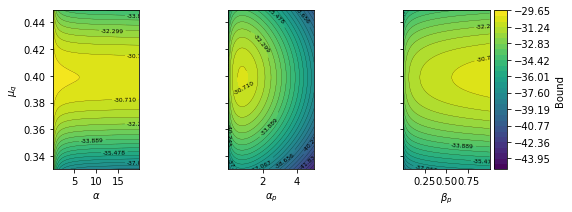

In [2]:
data_contour1 = pd.read_csv('../../numerical_analysis/contour_alpha_muq.csv')
data_contour1 = data_contour1.loc[:, ~data_contour1.columns.str.contains('^Unnamed')]
data_contour1 = data_contour1.fillna(np.nanmin(data_contour1.to_numpy()))
data_contour2 = pd.read_csv('../../numerical_analysis/contour_alpha_p_muq.csv')
data_contour2 = data_contour2.loc[:, ~data_contour2.columns.str.contains('^Unnamed')]
data_contour3 = pd.read_csv('../../numerical_analysis/contour_beta_p_muq.csv')
data_contour3 = data_contour3.loc[:, ~data_contour3.columns.str.contains('^Unnamed')]

linewidth_contour = 0.2
min_lev=data_contour2.to_numpy().min()
levels = np.linspace(data_contour2.to_numpy().min(),data_contour1.to_numpy().max(), num=30)

delta11 = 0.02
delta12 = 0.001
delta21 = 0.002
delta22 = 0.001
delta31 = 0.002
delta32 = 0.001

xlist1 = np.arange(0.0001, 20, delta11)
ylist1 = np.arange(0.33, 0.45, delta12)
xlist2 = np.arange(0.0001, 5, delta21)
ylist2 = np.arange(0.33, 0.45, delta22)
xlist3 = np.arange(0.0001, 1, delta31)
ylist3 = np.arange(0.33, 0.45, delta32)

x1, y1 = np.meshgrid(xlist1, ylist1)
x2, y2 = np.meshgrid(xlist2, ylist2)
x3, y3 = np.meshgrid(xlist3, ylist3)

fig, axes = plt.subplots(1,3,  figsize =(7,3))

cpf1 = axes[0].contourf(x1, y1, data_contour1.values.tolist(), levels)
line_colors1 = ['black' for l in cpf1.levels]
cp1 = axes[0].contour(x1, y1, data_contour1.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes[0].clabel(cp1, cp1.levels[::3], inline=True, fontsize=6)

cpf2 = axes[1].contourf(x2, y2, data_contour2.values.tolist(), levels)
line_colors2 = ['black' for l in cpf2.levels]
cp2 = axes[1].contour(x2, y2, data_contour2.values.tolist(),
                       levels=levels, colors=line_colors2, linewidths=linewidth_contour)
axes[1].clabel(cp2, cp2.levels[::3], inline=True, fontsize=6)

cpf3 = axes[2].contourf(x3, y3, data_contour3.values.tolist(), levels)
line_colors3 = ['black' for l in cpf3.levels]
cp3 = axes[2].contour(x3, y3, data_contour3.values.tolist(),
                       levels=levels, colors=line_colors3, linewidths=linewidth_contour)
axes[2].clabel(cp3, cp3.levels[::3], inline=True, fontsize=6)

#line_colors1 = ['black']
axes[0].set_xlabel(r'$\alpha$')
axes[0].set_ylabel(r'$\mu_q$')
axes[1].set_xlabel(r'$\alpha_p$')
axes[2].set_xlabel(r'$\beta_p$')
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])

axins3 = inset_axes(axes[2],
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes[2].transAxes,
                   borderpad=0,
                   )

plt.colorbar(cpf3,label='Bound', cax=axins3)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/univ_muq.pdf', bbox_inches='tight', pad_inches=0)
fig.tight_layout(w_pad=8.5, h_pad=0.5)
